In [49]:
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from lxml import etree
from nltk import word_tokenize
import pickle
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ag = etree.parse('../mathAG_2015.xml').getroot()
dg = etree.parse('../mathDG-2015.xml').getroot()

In [53]:
perc = []
for art in ag.iter(tag='article'):
    N = int(art.attrib['num'])
    perc += [int(n.attrib['index'])/N for n in art.findall('.//definition')]
for art in dg.iter(tag='article'):
    N = int(art.attrib['num'])
    perc += [int(n.attrib['index'])/N for n in art.findall('.//definition')]

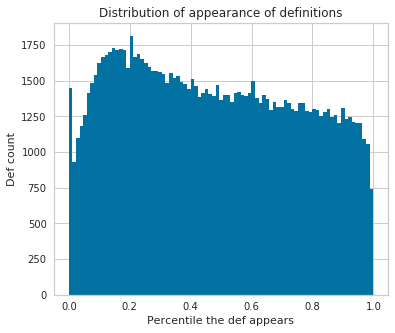

In [64]:
fig=plt.figure(figsize=(6, 5))
plt.xlabel('Percentile the def appears')
plt.ylabel('Def count')
plt.title('Distribution of appearance of definitions')
hi = plt.hist(perc, 85)

In [45]:
for k,D in enumerate(dg.iter(tag='definition')):
    try:
        print(D.find('.//dfndum').text,' --- ', (D.find('.//stmnt').text)[:70])
    except:
        pass
    if k>200: break

rigorous development  ---   A rigorous development of the SRVF metric. 
geodesic in  ---   Definition: A geodesic in _inline_math_ is a continuous function _inl
disjoint union  ---   Let _inline_math_, and let _inline_math_ be a constant map, _inline_m
Definition of P-segment  ---   Definition of P-segment: (Note that this is a long definition! It inc
P-segment  ---   _inline_math_ is a sequence of P-segments and N-segments; i.e., there
Lemma contains  ---   Note that this Lemma contains Lemma 20 as the special case in which t
almost flat manifold  ---   An almost flat manifold whose 2-sylow subgroup of the holonomy group 
An infranilmanifold  ---   An infranilmanifold is a double coset space _inline_math_ where _inli
normal subgroup  ---   Let _inline_math_. Then _inline_math_ is a normal subgroup of _inline
central involution  ---   A central involution _inline_math_ of an infranilmanifold _inline_mat
infranilmanifold  ---   Any infranilmanifold _inline_math_ with _inline_math_ a 2-g

In [35]:
empty_if_none = lambda s: s if s else ''
ag_lst = [p.text for p in ag.iter(tag='stmnt') if len(empty_if_none(p.text))> 5][:300]
dg_lst = [p.text for p in dg.iter(tag='stmnt') if len(empty_if_none(p.text))> 5][:300]

In [7]:
with open('../PickleJar/vectorizer.pickle', 'rb') as vzer_f:
    vzer = pickle.load(vzer_f)

In [23]:
tot_vec = vzer.transform(ag_lst + dg_lst)

In [32]:
tot_vec.shape

(200, 205970)

In [33]:
# ag is zero and dg is 1
labels_vec = len(ag_lst)*['math.AG'] + len(dg_lst)*['math.DG']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


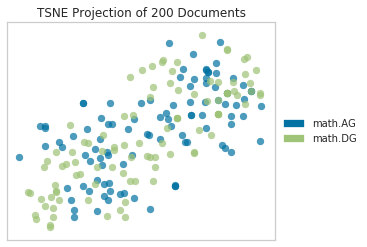

In [34]:
tsne2 = TSNEVisualizer(labels=['math.AG','math.DG'])
tsne2.fit(tot_vec, labels_vec)
tsne2.poof(figsize=50)